# Data Analysis Project — Telco Customer Churn
Motivation and aim for this project: To analyze the dataset and to make actionable insights to retain customers 
and increase customers’ lifetime values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
####Part 0: Imports the libraries for data loading,visualizition
####Reading data using pandas 
###Count number of rows, columns
### Using DataFrame.head() to get first 5 rows of DataFrame

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data driven mkt/Midterm 2/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("Number of row:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of row: 7043
Number of columns: 21


Description of this dataset: \
The data set includes information about: 
    Tập dữ liệu bao gồm 7043 hàng và 21 cột. Mỗi hàng đại diện cho một khách hàng, mỗi cột chứa các thuộc tính của khách hàng được mô tả.
     
*   Thông tin tài khoản khách hàng (họ đã là khách hàng trong bao lâu, hợp đồng, phương thức thanh toán, các khoản phí hàng tháng và tổng các khoản phí)
* Thông tin nhân khẩu học về khách hàng (giới tính, độ tuổi,...)
* Những khách hàng đã rời đi trong tháng trước (cột: Churn)
* Các dịch vụ mà khách hàng đã đăng ký (điện thoại, internet,TV trực tuyến  và phim,...)

# PART 1: QUICK DATA CHECK

In [ ]:
##Check data types using info() function 
df.info()
## What problem have you observed? -> fix it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Ở cột TotalCharges, giá trị trả về ở dạng float nhưng kiểu dữ liệu ở đây đang là object. Do đó, cách giải quyết là chúng ta phải chuyển kiểu dữ liệu của cột TotalCharges: từ kiểu dữ liệu object sang float bằng câu lệnh pd.to_numeric()     

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
##Check statistical information using describe()
df.describe()
##Make some conclusions 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Số tháng mà khách hàng đã ở lại công ty cao nhất là 72 tháng và ít nhất là 1 tháng. Tổng chi tiêu tối đa của khách hàng lên đến 8684.8. Trong khi đó, chi tiêu tối đa cho một tháng của khách hàng là 118.75.

In [ ]:
###Check for null values in our data and decide how to handle null-value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Từ đầu ra trên, chúng ta có thể nói rằng có **11 giá trị còn thiếu** ở cột TotalCharges. Cách giải quyết ở đây là chúng ta sẽ loại bỏ 11 hàng này khỏi tập dữ liệu bằng lệnh dropna()

In [ ]:
#Removing missing values 
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# PART 2: Exploratory Data Analysis

In [ ]:
###Check the balance of class label using value_counts()
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
###Create a stacked percentage bar chart for each demographic attribute (gender, SeniorCitizen, Partner, Dependents), 
###showing the percentage of Churn for each category of the attribute
###Draw a conclusion

In [ ]:
import math

In [ ]:
def stacked_percentage_chart(columns_to_plot, super_title):    
    n_columns = 2
    n_rows = math.ceil(len(columns_to_plot)/2)
    fig = plt.figure(figsize=(20, 5 * n_rows)) 
    fig.suptitle(super_title, fontsize=12,  y=.95)
 
    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(n_rows, n_columns, index)
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,rot=0)
        
        ax.legend(loc="upper right" , bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        ax.set_title('Proportion of observations by ' + column, loc='left')
        ax.tick_params(rotation='auto')

        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

In [ ]:
demographic = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

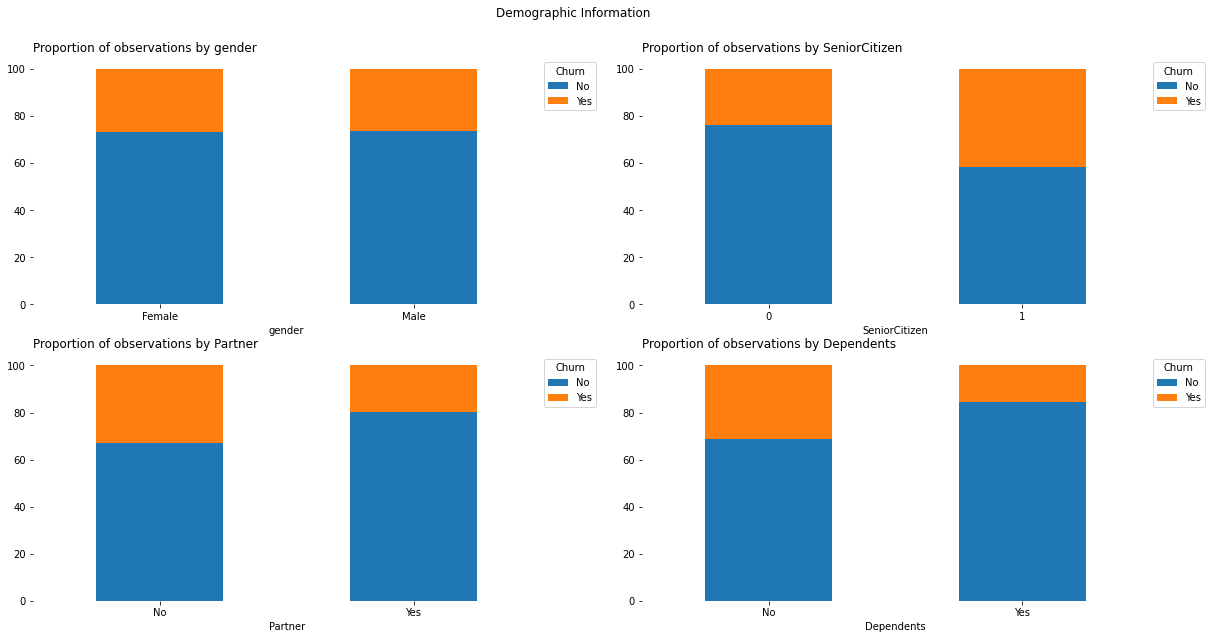

In [ ]:
stacked_percentage_chart(demographic, 'Demographic Information')

* Tỷ lệ rời đi của những người cao tuổi (**senior citizens**) gần như gấp đôi so với những người trẻ tuổi (**young citizens**).

* Giới tính không thể đóng một vai trò quan trọng trong dự đoán. Tỷ lệ churn là như nhau cho dù khách hàng là nam hay nữ.

* Những khách hàng có đối tác ít rời đi hơn so với những khách hàng không có đối tác.

In [ ]:
###Create a stacked percentage bar chart for each category of the customer account attributes 
###(Contract, PaperlessBilling, PaymentMethod).
###Draw a conclusion

In [ ]:
account_col = ['Contract', 'PaperlessBilling', 'PaymentMethod']

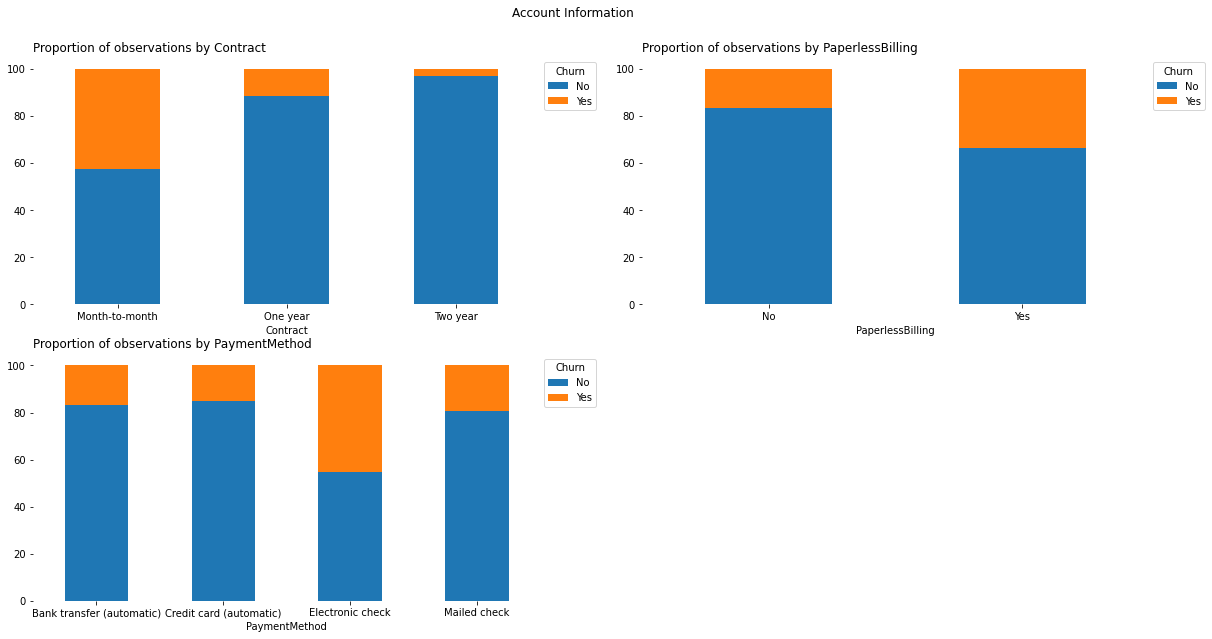

In [ ]:
stacked_percentage_chart(account_col, 'Account Information')

*   Khách hàng hợp đồng hàng tháng có tỷ lệ nghỉ việc cao hơn so với khách hàng hợp đồng hàng năm.
* Những khách hàng thanh toán bằng séc điện tử có nhiều khả năng từ bỏ công ty hơn.
* Những người đăng ký thanh toán không cần giấy tờ có tỷ lệ cao hơn những người không đăng ký.





In [ ]:
#### For all numeric attributes, the distributions of both classes (No and Yes) are different which suggests 
###that all of the attributes will be useful to determine whether or not a customer churns.
### Create a plot to show the distribution of tenure, MontlyCharges, TotalCharges by Churn 
### Draw a conclusion

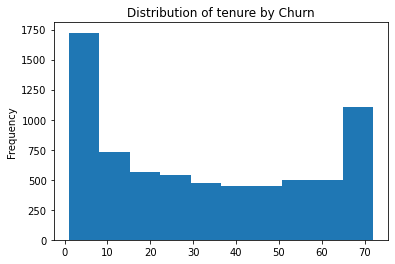

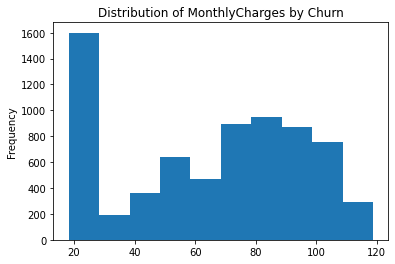

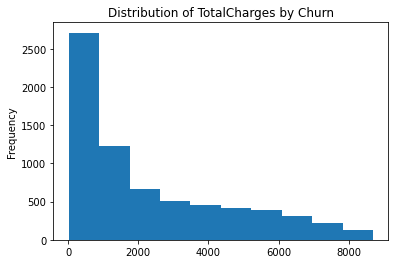

In [ ]:
for i in ['tenure', 'MonthlyCharges', 'TotalCharges']:
  ax = df[i].plot.hist(by = 'churn')
  ax.set_title(f'Distribution of {i} by Churn')
  plt.show()

Cả 3 biến đều không theo quy luật phân phối chuẩn
- tenure: đầu và cuối đồ thị lơn hơn hẳn so với trung tâm
- MontlyCharges: tăng mạnh ở đầu, sau đó giảm và lại tăng trở lại 
- TotalCharges: càng về sau càng giảm

In [ ]:
def hist_plot(columns_to_plot, super_title):
    n_columns = 2
    n_rows = math.ceil(len(columns_to_plot)/2)
    fig = plt.figure(figsize=(12, 5 * n_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 
    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(n_rows, n_columns, index)
        df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, label='No')
        df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, label='Yes')
        
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')
        ax.tick_params(rotation='auto')
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

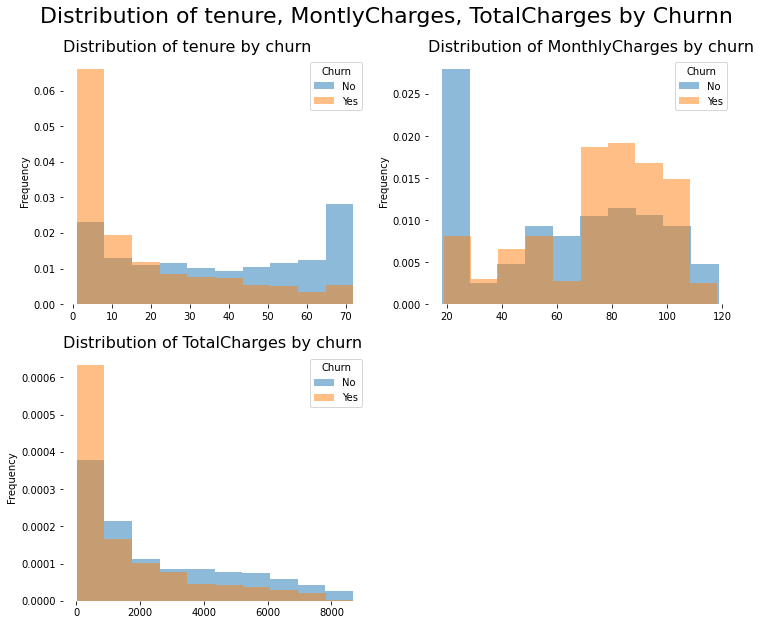

In [ ]:
# customer account column names
numeric_account_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
hist_plot(numeric_account_col, 'Distribution of tenure, MontlyCharges, TotalCharges by Churnn')

* Tỷ lệ churn có xu hướng lớn hơn khi phí hàng tháng (**monthly charge**) cao.
* Khách hàng mới (low **tenure**) có nhiều khả năng rời đi.
* Những khách hàng phải chịu tổng chi phí (**total charge**) cao  sẽ ít có xu hướng rời bỏ doanh nghiệp hơn.

In [ ]:
###evaluate the percentage of the target for each category of the services columns(PhoneService, MultipleLines, InternetService
###,OnlineSecurity,OnlineBackup, DeviceProtection,TechSupport,StreamingTV, StreamingMovie) with stacked bar plots
### Draw a conclusion

In [ ]:
service_col = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']

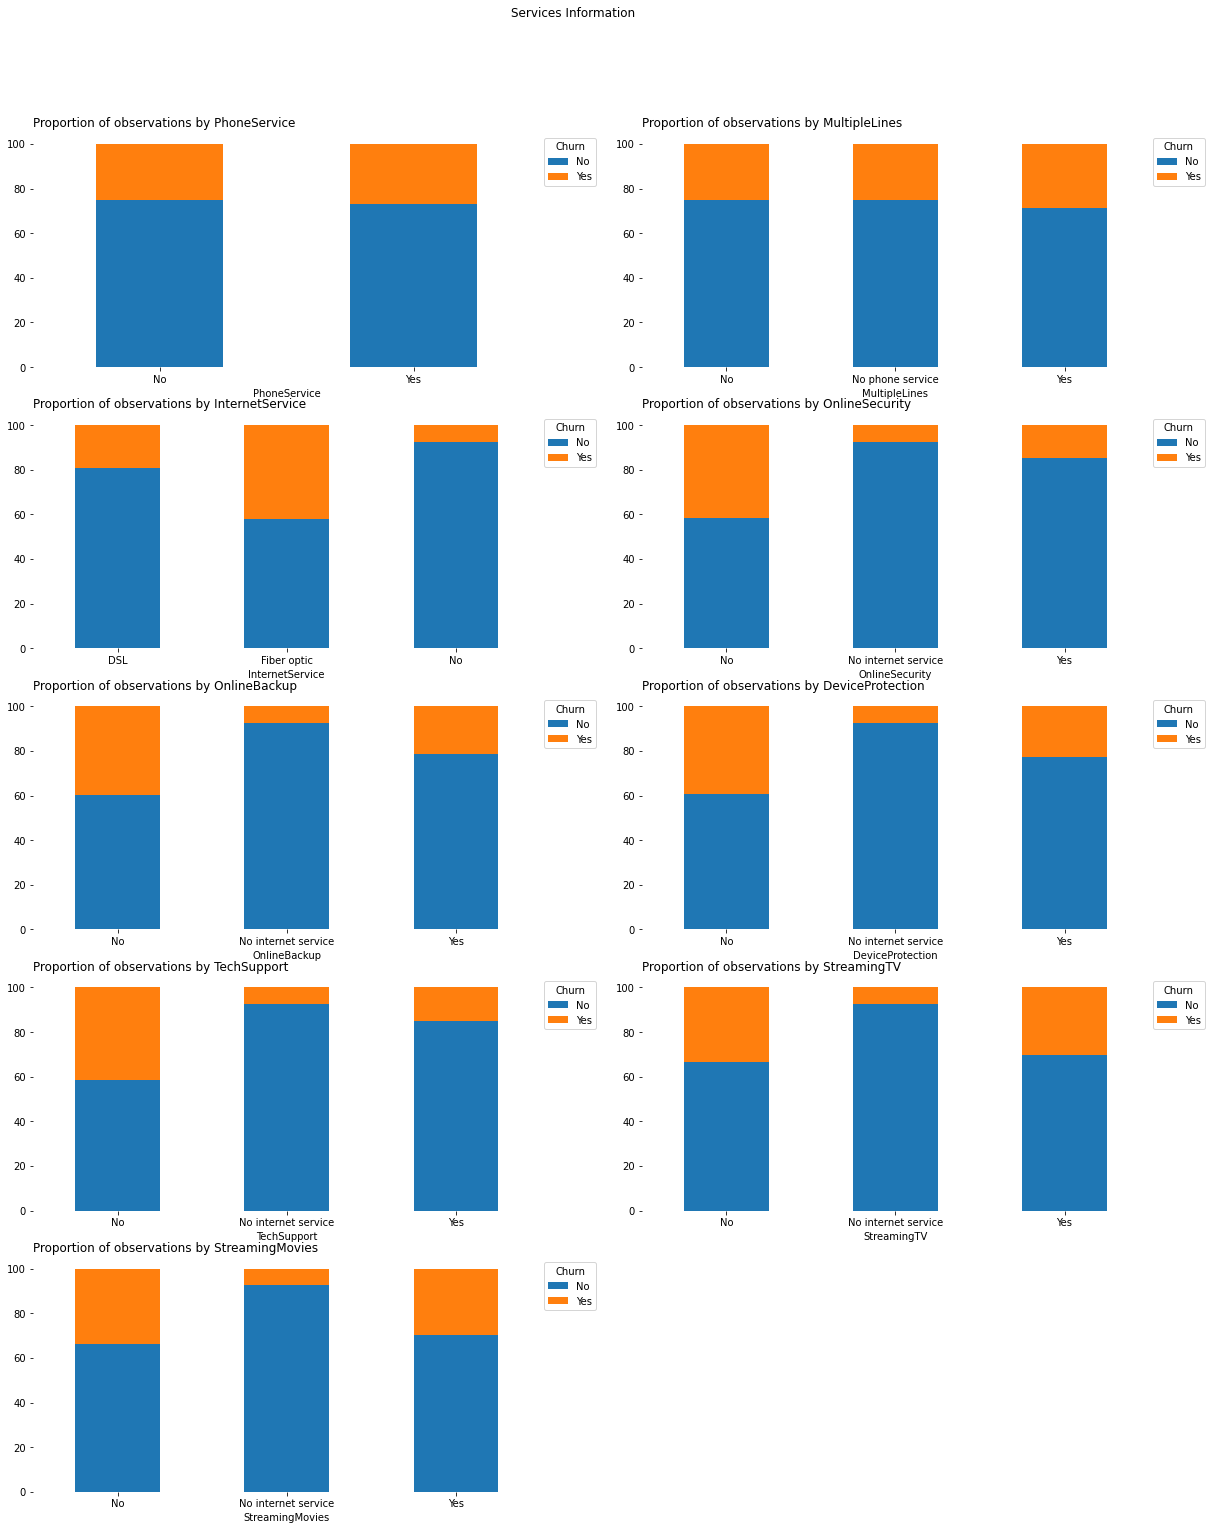

In [ ]:
stacked_percentage_chart(service_col, 'Services Information')

* Chúng tôi không mong đợi các thuộc tính điện thoại (**PhoneService và MultipleLines**) có sức mạnh dự đoán đáng kể. Tỷ lệ churn cho tất cả các lớp trong cả hai biến độc lập là gần như nhau.
* Những khách hàng có bảo mật trực tuyến (**online security**) ít gặp sự cố hơn những khách hàng không có nó.
* Những khách hàng không có quyền tiếp cận với bộ phận hỗ trợ kỹ thuật (**tech support**) thường bỏ cuộc nhiều hơn những khách hàng có.




# PART 3: FEATURE ENGINEERING

In [ ]:
### Use label encoding with the following binary variables: (1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, 
###(5)PhoneService , and (6)Churn .

### make a copy of your dataframe
df_transformed = df.copy()
df_transformed.drop(columns='customerID',inplace=True)

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling',
                          'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for i in label_encoding_columns:
    if i == 'gender':
        df_transformed[i] = df_transformed[i].map({'Female': 1, 'Male': 0})
    else: 
        df_transformed[i] = df_transformed[i].map({'Yes': 1, 'No': 0}) 

In [ ]:
### Apply one-hot encoding to the following categorical variables: (1) Contract, (2) PaymentMethod, (3) MultipleLines, 
### (4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, (7) DeviceProtection, (8) TechSupport, (9) StreamingTV,
### and (10)StreamingMovies.
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding

df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)

In [ ]:
### Normalization
### Use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for i in min_max_columns:
        min_col = df_transformed[i].min()
        max_col = df_transformed[i].max()
        df_transformed[i] = (df_transformed[i] - min_col) / (max_col - min_col) 

# PART 4: MODELING

In this project, we compare 3 different algorithms: RandomForest, ANN Model and Gradient Boosting Decision Tree

In [ ]:
#train test split: 70% of the sample set for training, 30% for testing 
from sklearn.model_selection import train_test_split
# select independent variables
X = df_transformed.drop(columns = ['Churn'])

# select dependent variables
y = df_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 40, stratify=y)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit 

In [ ]:
## For building ANN models in Python, we are going to use keras package, which
## is a high-level neural networks library. Uncomment the following line to install tensorflow and keras packages
!pip install tensorflow
!pip install keras

     |████████████████████████████████| 462 kB 5.6 MB/s 


In [ ]:
###run this cell. This function will return a neural
###network model with one hidden layer. 
### n is the number of features in training dataset 
from keras.models import Sequential
from keras.layers import Dense
def ANN(n):
    model = Sequential()
    model.add(Dense(16, input_dim=n, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
### This function returns a list of algorithms we are going to assess
def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''
    ### n: the number of features of X_train
    n= X_train.shape[1]
    models = []
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    models.append(('ANN',ANN(n)))
    return models

# create a list of methods
models = create_models()

In [ ]:
models

[('random_forest', RandomForestClassifier(random_state=2)),
 ('gradient_boosting', GradientBoostingClassifier(random_state=2)),
 ('ANN', <keras.engine.sequential.Sequential at 0x7f65b99b5cd0>)]

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
983,0,0,0,0,0.000000,1,1,0.680100,0.007824,0,...,0,0,1,1,0,0,0,0,1,0
6565,0,0,1,0,0.845070,1,1,0.875124,0.733487,0,...,0,0,1,1,0,0,0,0,1,0
2212,0,0,0,0,0.126761,1,0,0.012438,0.023892,1,...,0,1,0,0,1,0,0,0,0,1
2526,0,0,0,0,0.000000,1,0,0.011443,0.000069,1,...,0,1,0,1,0,0,0,0,0,1
2751,1,0,1,1,0.253521,0,1,0.065672,0.048004,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0,0,0,0,0.563380,1,1,0.557214,0.354293,1,...,1,0,0,1,0,0,0,0,1,0
6532,1,1,0,0,0.239437,1,0,0.020896,0.040480,1,...,0,1,0,0,1,0,1,0,0,0
3528,0,0,0,0,0.211268,1,1,0.014428,0.037341,1,...,0,1,0,1,0,0,0,0,0,1
943,1,0,1,0,1.000000,0,0,0.470149,0.565532,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# test different metrics of each model using default hyperparameters
# Create a dictionary named results, this is a dictionary of dictionaries (see the below cell for example)
results = {}
for name, model in models:
    # fit the model with the training data
    if name == 'ANN':
        model.fit(X_train,y_train,epochs = 50, batch_size = 100)
        y_predict = [round(x[0]) for x in model.predict(X_test)]
        y_predict_proba = [x[0] for x in model.predict(X_test)]
    else:
        ##your code here## ##fit your model with X_train, y_train
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)   
        
        ##the predicted probability for the class 1##
        y_predict_proba = model.predict_proba(X_test)[::,1]

    # calculate accuracy, precision_score, recall_score, AUC
    accuracy = round(accuracy_score(y_test, y_predict),2)
    precision = round(precision_score(y_test, y_predict),2)
    recall = round(recall_score(y_test, y_predict),1)
    roc = round(roc_auc_score(y_test, y_predict),2)
    
    # append the model name and 3 metrics to the dictionary results
    
    results[name]= {'Accuracy':accuracy, 'precision': precision,  'recall': recall_score, 'auc' : roc}

Epoch 1/50
50/50 [==============================] - 1s 5ms/step - loss: 0.5690 - accuracy: 0.7312
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.7408
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.7710
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.7792
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4408 - accuracy: 0.7887
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4354 - accuracy: 0.7911
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.7915
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.7934
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7942
Epoch 10/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4258 - accuracy: 0.7948
Epoch 11/50
50/50 [

### the dictionary looks like this one
results = 
{'random_forest': {'accuracy': 0.7,
  'precision': 0.6,
  'recall': 0.,
  'auc': 0.},
 'gradient_boosting': {'accuracy': 0.,
  'precision': 0.,
  'recall': 0.,
  'auc': 0
 'ANN': {'accuracy': 0.,
  'precision': 0.,
  'recall': 0.,
  'auc': 0.}}

In [ ]:
##uncomment the following code
pd.DataFrame(results)

Which method will you choose in this case?